In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
pd.set_option('display.max_colwidth',120)
pd.get_option('display.max_colwidth')

120

In [7]:
tweet_data = pd.read_csv('WorldCupDraw_Cleansed_Final.csv',encoding='utf8',index_col='id')

In [8]:
tweet_data.head()

,text,screen_name,retweet_count,favorite_count,friends_count,followers_count,url,RT,original_tweeter,emojis_used,reply_count,avg_reply_retweet,avg_reply_fav
id,,,,,,,,,,,,,
937247505208827904,Eden Hazard says the England and Belgium players are excited about the #MOTD,SPonTheBall,35,0,81,25,https://t.co/0Ekz6haggd,True,BBCMOTD,NaN,6,0.000000,0.500000
937247428973088768,Legend! #SCFC,boothen_talers,396,0,294,287,https://t.co/NF4w2eDNXp,True,stokecity,👔😎🔴⚪️,17,0.058824,2.176471
937246905980952576,And South Korea round off Group F! What do you think #DieMannschaft fans?,naneth_mandagi,1181,0,181,65,https://t.co/nCqErE1w9P,True,DFB_Team_EN,🇰🇷,17,0.529412,14.647059
937246600803618816,When @matshummels and @os_alanis play against each other in Russia...,Drizzy__Fake,1582,0,109,306,https://t.co/udLBbxZPKM,True,FCBayernUS,NaN,18,0.833333,7.944444
937245866456428545,When you find out you gotta play @DeBruyneKev and @VincentKompany #WC2018,egn_ho,3313,0,518,643,https://t.co/d1LQSMB5Nu,True,kylewalker2,NaN,17,0.823529,82.176471


In [9]:
#tweet_data.set_index('id',inplace=True)

In [10]:
#tweet_data.mean()

In [11]:
stat = pd.DataFrame(tweet_data,columns= ['retweet_count','favorite_count','friends_count','followers_count','reply_count'])

In [12]:
%matplotlib inline

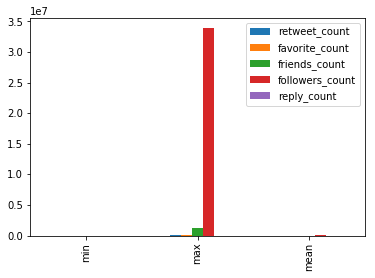

In [13]:
stat.agg(['min','max','mean']).plot(kind='bar')

In [14]:
tweet_data[~tweet_data.RT].shape

(6815, 13)

In [15]:
tweet_data.duplicated(subset=['text','screen_name']).sum()

108

In [16]:
tweet_data.loc[tweet_data.duplicated(subset=['text','screen_name'], keep=False)].sort_values('screen_name').head()

,text,screen_name,retweet_count,favorite_count,friends_count,followers_count,url,RT,original_tweeter,emojis_used,reply_count,avg_reply_retweet,avg_reply_fav
id,,,,,,,,,,,,,
936648905479065600,To round off the here's Group H!,AdajeObiaboSund,4,0,2926,612,https://t.co/tBQBbKsC6m,True,GoalUK,NaN,2,0.000000,1.000000
936648891730223105,To round off the here's Group H!,AdajeObiaboSund,15,0,2926,612,https://t.co/fEvGlrrIaG,True,goal,NaN,2,0.000000,0.500000
936631680026243073,Two of the surest things on earth; - Death - Nigeria Vs Argentina World cup fixture,Adorable_Outfit,837,0,5894,8112,https://t.co/7eT3gQOmH1,True,Tunnyking,NaN,18,1.166667,1.444444
936838320822169601,Two of the surest things on earth; - Death - Nigeria Vs Argentina World cup fixture,Adorable_Outfit,834,0,5894,8110,https://t.co/7eT3gQOmH1,True,Tunnyking,NaN,18,1.166667,1.444444
936628117480800256,194 Days Left to #FIFAWorldCup2018,AndImLee,11,0,25352,35292,https://t.co/XvzrrhP7Pa,True,AndImLee,NaN,2,0.000000,0.500000


In [17]:
tweet_data.loc[tweet_data.duplicated(subset=['text','screen_name'], keep=False)].screen_name.value_counts().sort_values(ascending=False).head(10)

classicshirts      12
RequestABet         7
Iam_Abdulaxis       6
CollinsKevs         5
fifa15reviews       4
Rouvafe             4
bet365              4
Obobanj             4
watchkwese          3
World_Cup_Times     3
Name: screen_name, dtype: int64

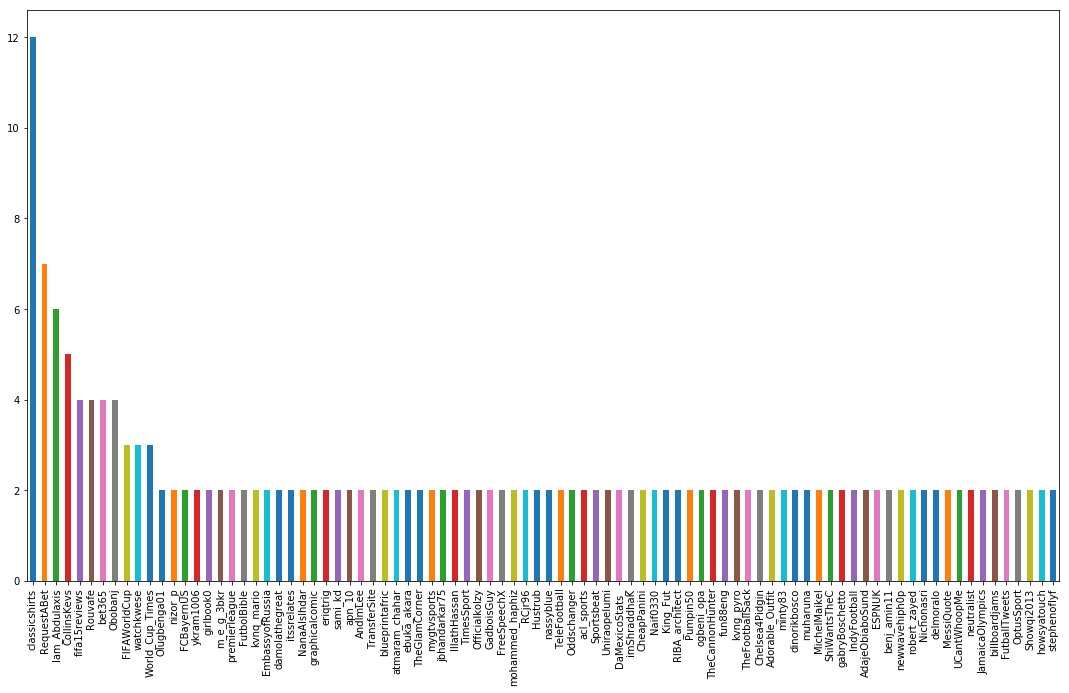

In [18]:
dub_tweet = tweet_data.loc[tweet_data.duplicated(subset=['text','screen_name'], keep=False)].screen_name.value_counts().plot(kind='bar')
fig = dub_tweet.get_figure()
fig.set_size_inches(18.5,10.5)
fig.savefig('dub_tweet.png',format='png',dpi=100)

6833

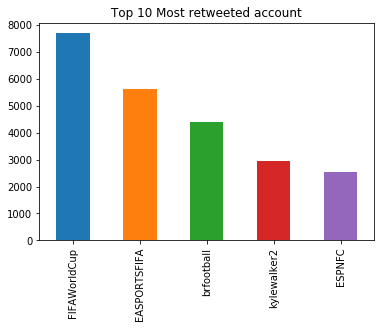

In [19]:
tweet_data.original_tweeter.value_counts().head().plot(kind='bar',title='Top 10 Most retweeted account')
tweet_data.original_tweeter.isna().sum()

In [20]:
tweet_data.drop_duplicates(subset=['text','screen_name'],inplace=True)

In [21]:
tweet_data.head()

,text,screen_name,retweet_count,favorite_count,friends_count,followers_count,url,RT,original_tweeter,emojis_used,reply_count,avg_reply_retweet,avg_reply_fav
id,,,,,,,,,,,,,
937247505208827904,Eden Hazard says the England and Belgium players are excited about the #MOTD,SPonTheBall,35,0,81,25,https://t.co/0Ekz6haggd,True,BBCMOTD,NaN,6,0.000000,0.500000
937247428973088768,Legend! #SCFC,boothen_talers,396,0,294,287,https://t.co/NF4w2eDNXp,True,stokecity,👔😎🔴⚪️,17,0.058824,2.176471
937246905980952576,And South Korea round off Group F! What do you think #DieMannschaft fans?,naneth_mandagi,1181,0,181,65,https://t.co/nCqErE1w9P,True,DFB_Team_EN,🇰🇷,17,0.529412,14.647059
937246600803618816,When @matshummels and @os_alanis play against each other in Russia...,Drizzy__Fake,1582,0,109,306,https://t.co/udLBbxZPKM,True,FCBayernUS,NaN,18,0.833333,7.944444
937245866456428545,When you find out you gotta play @DeBruyneKev and @VincentKompany #WC2018,egn_ho,3313,0,518,643,https://t.co/d1LQSMB5Nu,True,kylewalker2,NaN,17,0.823529,82.176471


In [29]:
cleansed_data_set = pd.read_csv('WorldCupDraw Preprocessed Dataset.csv',encoding='utf-8',index_col='id')
cleansed_data_set.shape

(77382, 16)

In [30]:
cleansed_data_set.head()

,text,screen_name,retweet_count,favorite_count,friends_count,followers_count,url,RT,original_tweeter,emojis_used,reply_count,avg_reply_retweet,avg_reply_fav,num_positive_replies,num_negative_replies,positive_percentage
id,,,,,,,,,,,,,,,,
937247505208827904,Eden Hazard says the England and Belgium players are excited about the #MOTD,SPonTheBall,35,0,81,25,https://t.co/0Ekz6haggd,True,BBCMOTD,NaN,6,0.000000,0.500000,2,4,33.33
937247428973088768,Legend! #SCFC,boothen_talers,396,0,294,287,https://t.co/NF4w2eDNXp,True,stokecity,👔😎🔴⚪️,17,0.058824,2.176471,12,5,70.59
937246905980952576,And South Korea round off Group F! What do you think #DieMannschaft fans?,naneth_mandagi,1181,0,181,65,https://t.co/nCqErE1w9P,True,DFB_Team_EN,🇰🇷,17,0.529412,14.647059,9,8,52.94
937246600803618816,When @matshummels and @os_alanis play against each other in Russia...,Drizzy__Fake,1582,0,109,306,https://t.co/udLBbxZPKM,True,FCBayernUS,NaN,18,0.833333,7.944444,7,11,38.89
937245866456428545,When you find out you gotta play @DeBruyneKev and @VincentKompany #WC2018,egn_ho,3313,0,518,643,https://t.co/d1LQSMB5Nu,True,kylewalker2,NaN,17,0.823529,82.176471,10,7,58.82


In [33]:
cleansed_data_set.sort_values('reply_count',inplace=True,ascending=False)

In [38]:
grouped_df = cleansed_data_set.loc[cleansed_data_set.duplicated(subset=['text','screen_name'], keep=False)].groupby(['text','screen_name'])

In [41]:
# for key, item in grouped_df:
#     print(grouped_df.get_group(key), "\n\n")

                                                                                    text  \
id                                                                                         
936666146018873344  #Australia  #Peru  #Denmark  poor guys ! #WorldCup2018 #worldcupdraw   
936633186104176640  #Australia  #Peru  #Denmark  poor guys ! #WorldCup2018 #worldcupdraw   

                   screen_name  retweet_count  favorite_count  friends_count  \
id                                                                             
936666146018873344  GadboisGuy              1               0            335   
936633186104176640  GadboisGuy              1               1            335   

                    followers_count                      url     RT  \
id                                                                    
936666146018873344              244  https://t.co/XDX3USe6TM   True   
936633186104176640              244  https://t.co/XDX3USe6TM  False   

                   origin

                                                text    screen_name  \
id                                                                    
936625451442868225  FIFA WORLD CUP GROUP STAGE DRAW!  FutballTweets   
936625646121422849  FIFA WORLD CUP GROUP STAGE DRAW!  FutballTweets   

                    retweet_count  favorite_count  friends_count  \
id                                                                 
936625451442868225           1978            1490         142118   
936625646121422849           1978               0         142118   

                    followers_count                      url     RT  \
id                                                                    
936625451442868225           346165  https://t.co/zRdiNh1cis  False   
936625646121422849           346165  https://t.co/zRdiNh1cis   True   

                   original_tweeter emojis_used  reply_count  \
id                                                             
936625451442868225           

                                                                 text  \
id                                                                      
936616630792179712  One dangerous man... the other is Vladimir Putin.   
936724314983948288  One dangerous man... the other is Vladimir Putin.   

                   screen_name  retweet_count  favorite_count  friends_count  \
id                                                                             
936616630792179712    King_Fut             75             150            734   
936724314983948288    King_Fut             75               0            734   

                    followers_count                      url     RT  \
id                                                                    
936616630792179712            59514  https://t.co/BfqLSnx7Mx  False   
936724314983948288            59426  https://t.co/BfqLSnx7Mx   True   

                   original_tweeter emojis_used  reply_count  \
id                                   

                         text screen_name  retweet_count  favorite_count  \
id                                                                         
937025722346082304  Vote here  m_e_g_3bkr              1               1   
937025770198888449  Vote here  m_e_g_3bkr              1               0   

                    friends_count  followers_count                      url  \
id                                                                            
937025722346082304            238              252  https://t.co/MiCvVxEAgM   
937025770198888449            238              252  https://t.co/MiCvVxEAgM   

                       RT original_tweeter emojis_used  reply_count  \
id                                                                    
937025722346082304  False              NaN           👌            1   
937025770198888449   True       m_e_g_3bkr           👌            1   

                    avg_reply_retweet  avg_reply_fav  num_positive_replies  \
id             

In [43]:
cleansed_data_set.drop_duplicates(subset=['text','screen_name'],keep='first',inplace=True)

In [44]:
cleansed_data_set.shape

(77274, 16)

In [47]:
cleansed_data_set.reset_index(inplace=True)
cleansed_data_set.head()

,id,text,screen_name,retweet_count,favorite_count,friends_count,followers_count,url,RT,original_tweeter,emojis_used,reply_count,avg_reply_retweet,avg_reply_fav,num_positive_replies,num_negative_replies,positive_percentage
0,936624698753998849,@camiliuchi @tgdesrosier @tankerdude01 @stuartroxy @thomas_embleton @AncientSubHunt @WarDiaryF82 @Zmilitar,juanmab,1,4,210,1023,https://t.co/vaq21PpJaJ,False,NaN,…,40,3.625000,6.350000,18,22,45.00
1,936605563001229312,NOTE: Only two European teams can be in the same group. Teams cannot be in the same group against opponents from t,DaMexicoStats_,1,1,2957,4370,https://t.co/nfCbWmE9Ol,False,NaN,…,37,1.216216,1.459459,5,32,13.51
2,936610210948571136,Following the draw I will post more information about all eight #WorldCup groups including the teams matches da,DaMexicoStats_,1,4,2957,4370,https://t.co/fLY5B177Xj,False,NaN,…,37,1.216216,1.459459,5,32,13.51
3,936630386679009290,Here are your official #WorldCup groups following today's ! A B C D,DaMexicoStats_,9,9,2958,4371,https://t.co/9ZFRIEvgc9,False,NaN,🇷🇺🇸🇦🇪🇬🇺🇾🇵🇹🇪🇸🇲🇦🇮🇷🇫🇷🇦🇺🇵🇪🇩🇰🇦🇷🇮🇸🇭🇷…,36,1.222222,1.472222,5,31,13.89
4,936578028502765569,Please be advised that the draw will take much longer than it needs to take. It always does so get used to it. FIF,DaMexicoStats_,1,1,2957,4370,https://t.co/r18HURtdk4,False,NaN,…,36,1.222222,1.472222,5,31,13.89


In [48]:
cleansed_data_set.to_csv(path_or_buf='WorldCupDraw Preprocessed Dataset wo Dups.csv',encoding='utf-8',index=False)